### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [2]:
ETTm1 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm1.csv")
training_df, val_df, test_df = split_dataset(ETTm1, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [3]:
p_lag = 96
future_steps = round(48)
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]

#### ETTm1

#### RLinear

Random seed set as 42
Rlinear activated


Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 12.562477136611939
Current (running) training loss at iteration 10000 : 10.234788462638855
Current (running) training loss at iteration 15000 : 8.87884499422709
Current (running) training loss at iteration 20000 : 8.033502016639709
Current (running) training loss at iteration 25000 : 7.169301204471588
Current (running) training loss at iteration 30000 : 6.516479789527257

Epoch 0: 

Train metrics: -------
Running (training) loss is 5.931804859022628.
Training MAE is 0.6353619548294425.
Training MSE is 5.938743148410692.
Training MAPE is 1896665655.2747915.

Val metrics: -------
Running (validation) loss is 2.1676071895236584.
Validation MAE is 0.3951530055326391.
Validation MSE is 2.172357197577363.
Validation MAPE is 0.030729232849418996.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 50

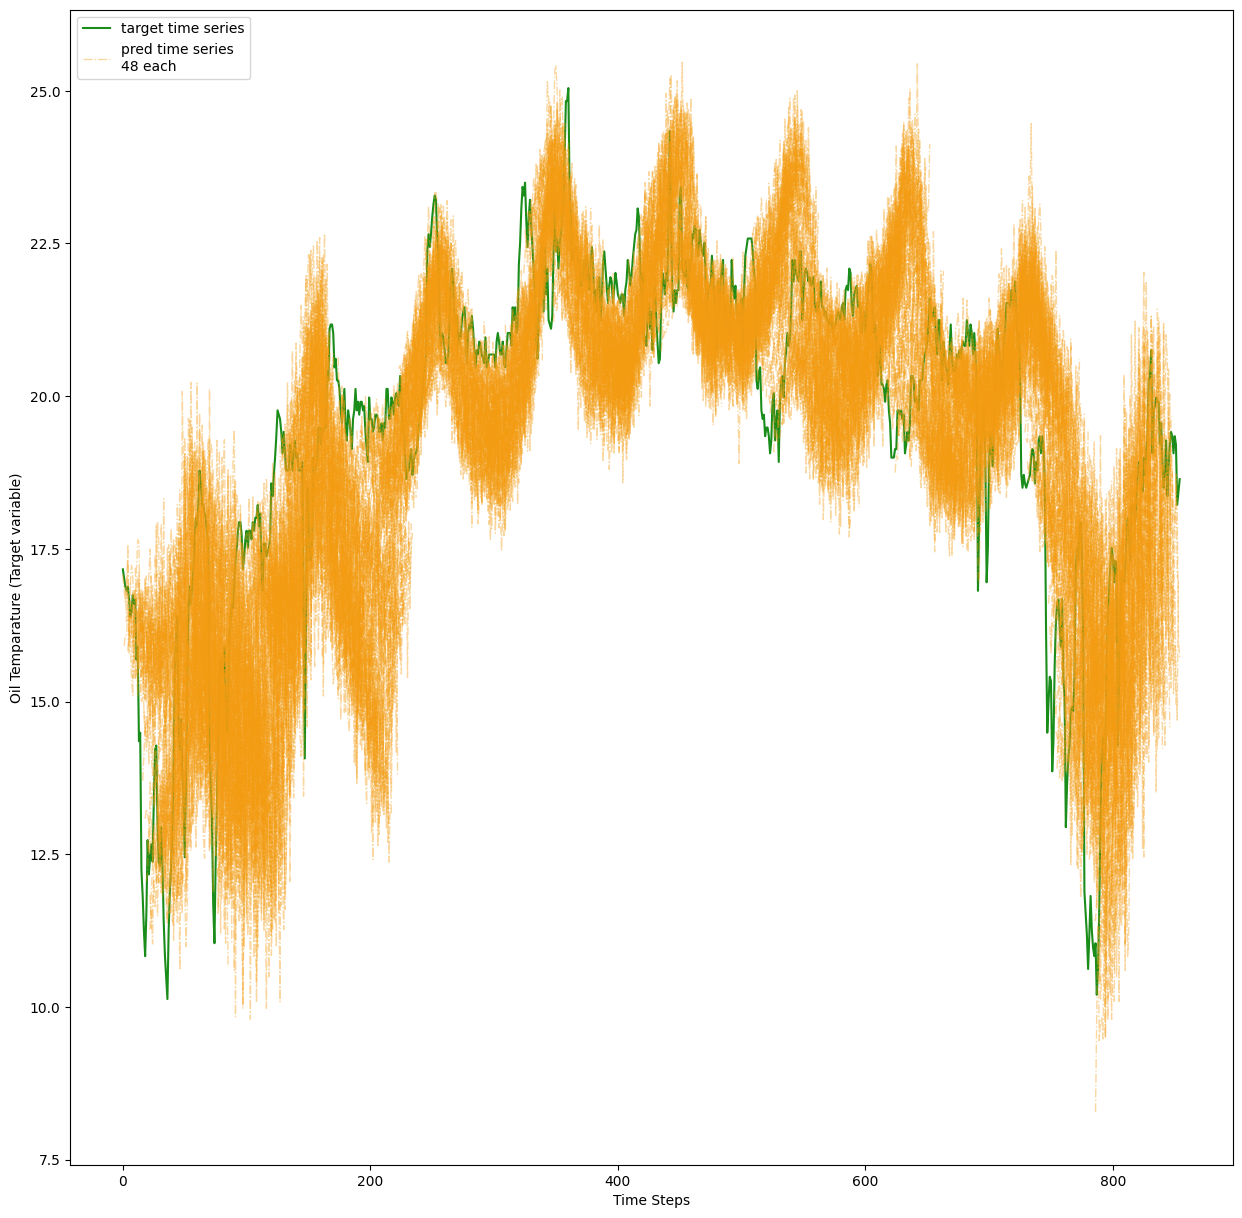

In [4]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rlinear'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
#evaluate_on_test_data(test_data = test_data, neural_net = net)

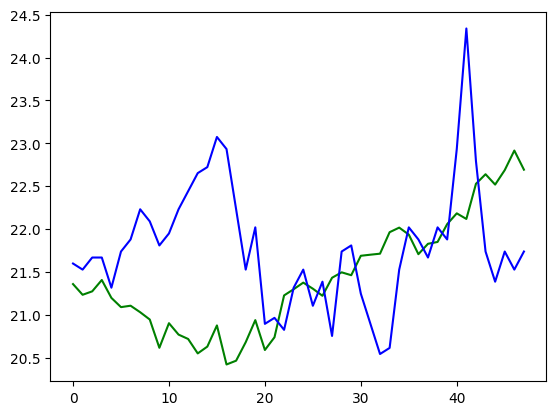

In [5]:
import matplotlib.pyplot as plt
neti = net.eval()
for i, (inputs, targets) in enumerate(test_data): 
    if i == 50: 
        break
    else: 
        output = neti(inputs)

plt.plot(output[1,:].tolist(), 'g')
plt.plot(targets[1,0,:].tolist(), 'b')

#### Dlinear

Random seed set as 42
Dlinear activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 7.868385168457031
Current (running) training loss at iteration 10000 : 6.190464957237244
Current (running) training loss at iteration 15000 : 5.322214954185486
Current (running) training loss at iteration 20000 : 5.2735105180263515
Current (running) training loss at iteration 25000 : 4.8668166066741945
Current (running) training loss at iteration 30000 : 4.746152906195323

Epoch 0: 

Train metrics: -------
Running (training) loss is 4.5531352386186015.
Training MAE is 0.5861991847643662.
Training MSE is 4.560861935368485.
Training MAPE is 1116244774.7218702.

Val metrics: -------
Running (validation) loss is 32.41873340297416.
Validation MAE is 1.6407005517713484.
Validation MSE is 32.42533648316796.
Validation MAPE is 0.13657129772247806.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 7.032291817092895
Current (running) training loss at iter

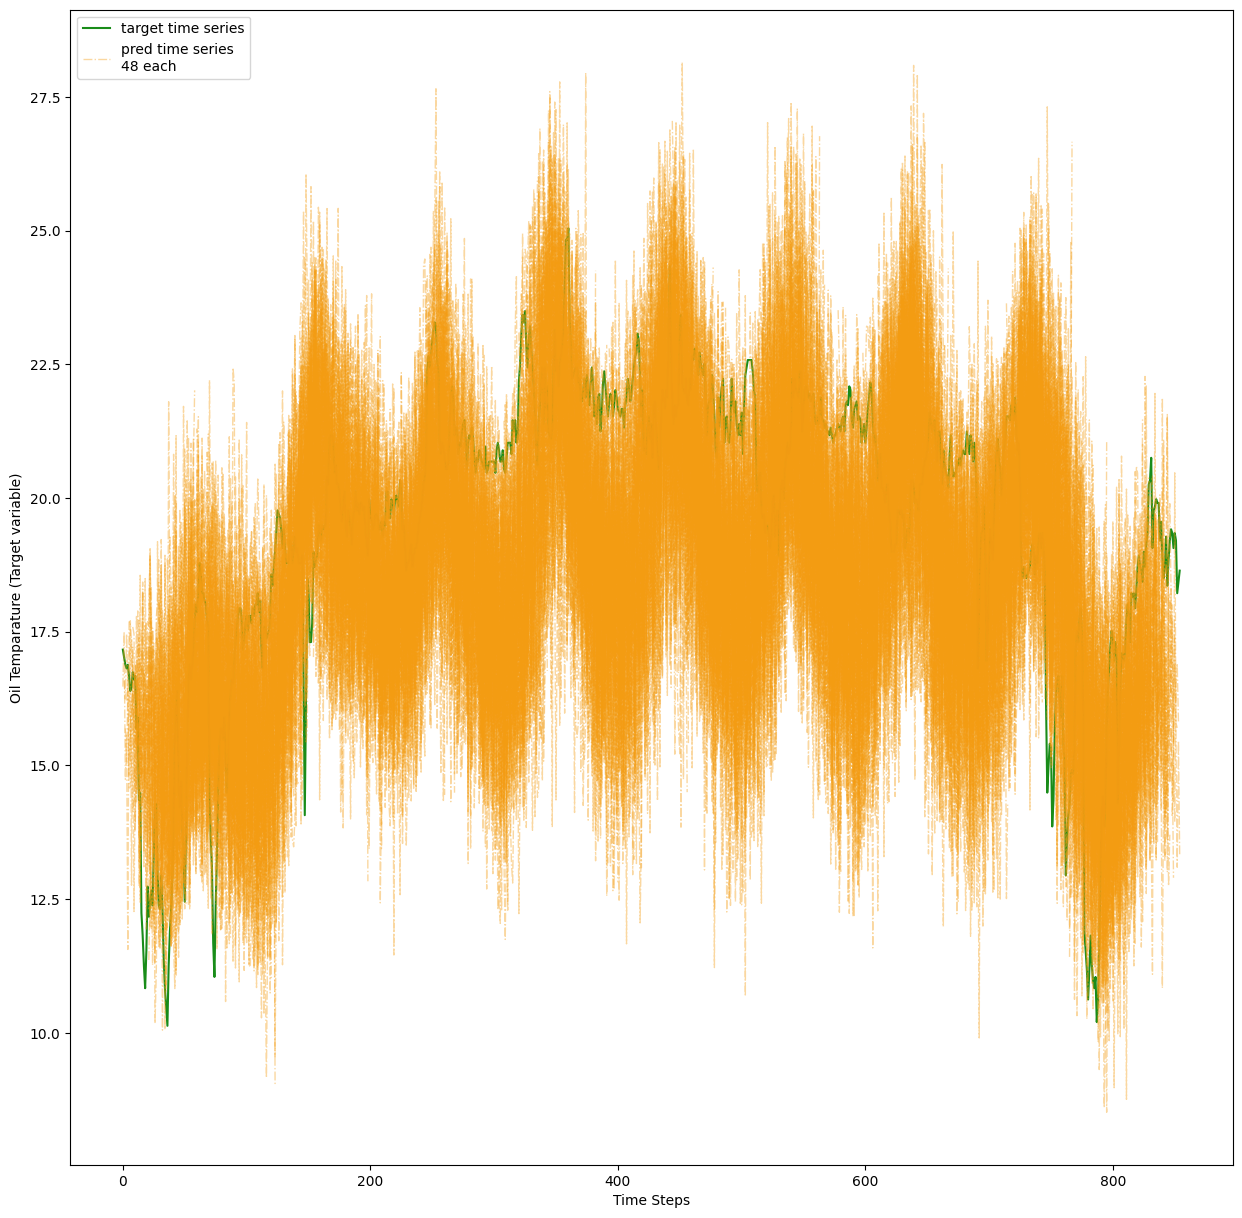

In [6]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'dlinear'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### RLMP

Random seed set as 42
RMLP activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 19.153916505813598
Current (running) training loss at iteration 10000 : 12.879569249629974
Current (running) training loss at iteration 15000 : 9.836165827624002
Current (running) training loss at iteration 20000 : 8.112823917806148
Current (running) training loss at iteration 25000 : 6.9295902729415895
Current (running) training loss at iteration 30000 : 6.301871561614672

Epoch 0: 

Train metrics: -------
Running (training) loss is 5.75369815356903.
Training MAE is 0.5977970564115326.
Training MSE is 5.761747740410654.
Training MAPE is 1096162823.4962518.

Val metrics: -------
Running (validation) loss is 1.6182184436178895.
Validation MAE is 0.3386892277335744.
Validation MSE is 1.623172997589707.
Validation MAPE is 0.027022677686579358.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 1.9600287019729614
Current (running) training loss at it

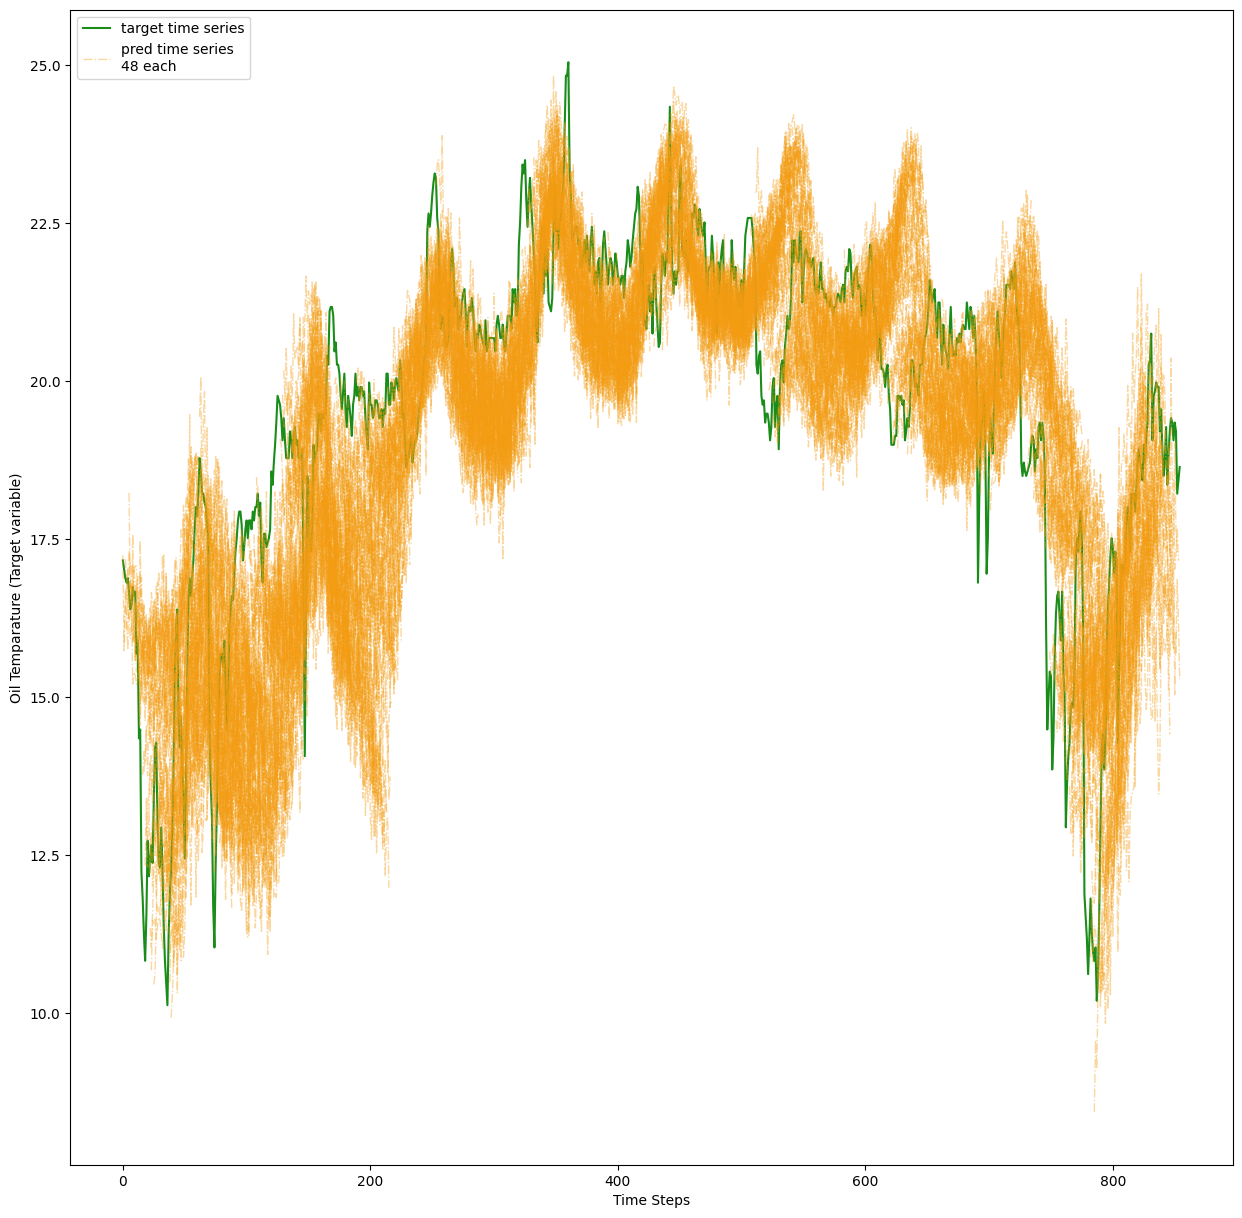

In [7]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rmlp'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)